In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_csv('./data/kaggle_titanic_train.csv')
test = pd.read_csv('./data/kaggle_titanic_test.csv')
sub = pd.read_csv('./data/kaggle_titanic_gender_submission.csv')

In [12]:
print(train.shape)
print(train.info())
print(train.describe())
print(train.columns)
print(train.isnull().sum())

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.12

In [13]:
print(test.shape)
print(test.info())
print(test.describe())
print(test.columns)
print(test.isnull().sum())

(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.0000

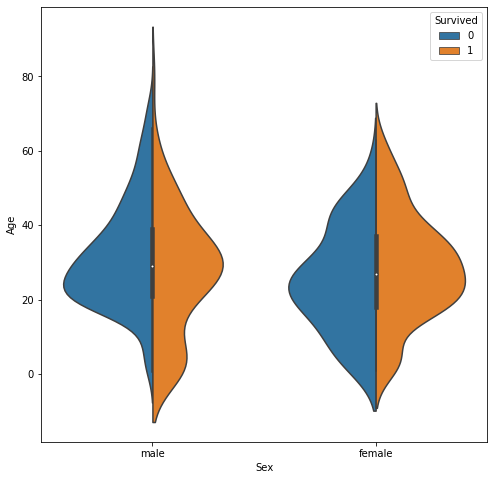

In [14]:
fig = plt.figure(figsize=(8,8))
sns.violinplot(x='Sex', y='Age',
              hue='Survived',
              data=train,
              split=True,
              )

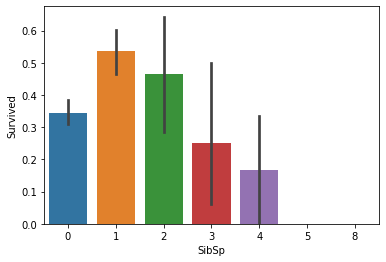

In [20]:
sns.barplot(x='SibSp', y='Survived',
           data=train)

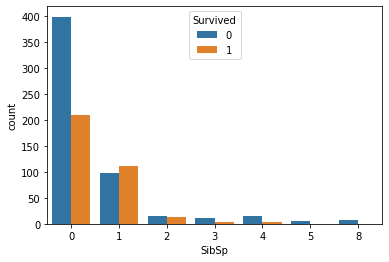

In [18]:
sns.countplot(x="SibSp",hue='Survived', data=train)

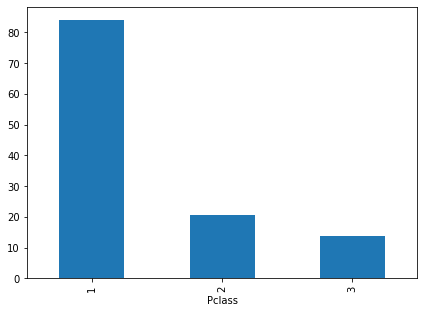

In [26]:
ax = plt.subplot()
a = train.groupby('Pclass').mean()['Fare']
a.plot(kind='bar', figsize=(7,5), ax=ax)

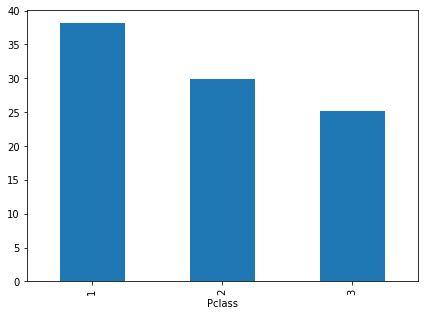

In [29]:
ax = plt.subplot()
b = train.groupby('Pclass').mean()['Age']
b.plot(kind='bar', figsize=(7,5), ax=ax)
# b.plot(kind='bar', figsize=(7,5), ax=ax)

In [31]:
c = train.groupby(['Pclass', 'Survived']).mean()['Age']

In [32]:
c


Pclass  Survived
1       0           43.695312
        1           35.368197
2       0           33.544444
        1           25.901566
3       0           26.555556
        1           20.646118
Name: Age, dtype: float64

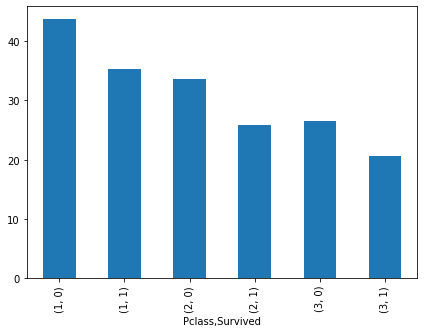

In [33]:
ax = plt.subplot()
c.plot(kind='bar', figsize=(7,5), ax=ax)

In [35]:
?sns.barplot

In [41]:
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = train['Age'].fillna(-0.5)

In [42]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]  # 나이대 구분
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

In [43]:
import numpy as np
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]  # 나이대 구분
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 
          'Young Adult', 'Adult', 'Senior']

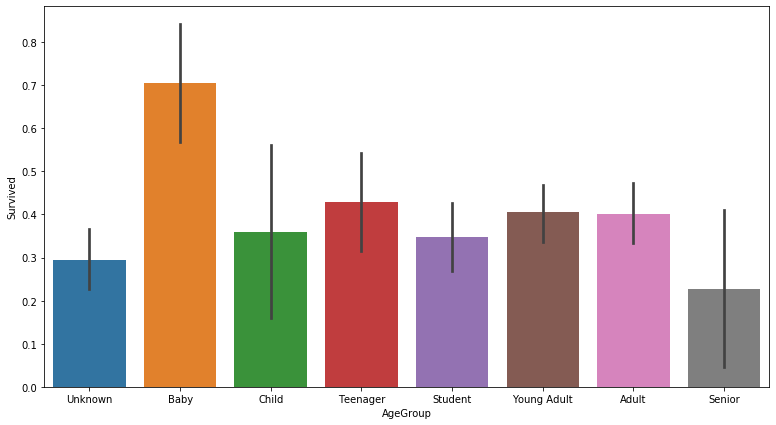

In [44]:
train['AgeGroup'] = pd.cut(train['Age'], bins, labels=labels)
train['AgeGroup'].head()

fig = plt.figure(figsize=(13, 7))
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

In [77]:
test['AgeGroup'] = pd.cut(test['Age'], bins, labels=labels)
test['AgeGroup'].head()

0        Student
1          Adult
2    Young Adult
3    Young Adult
4    Young Adult
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [45]:
bins1 = [-1, 0,10,30,60, np.inf]
labels1 = ['Unknown','Baby','Young','Adult','Senior']

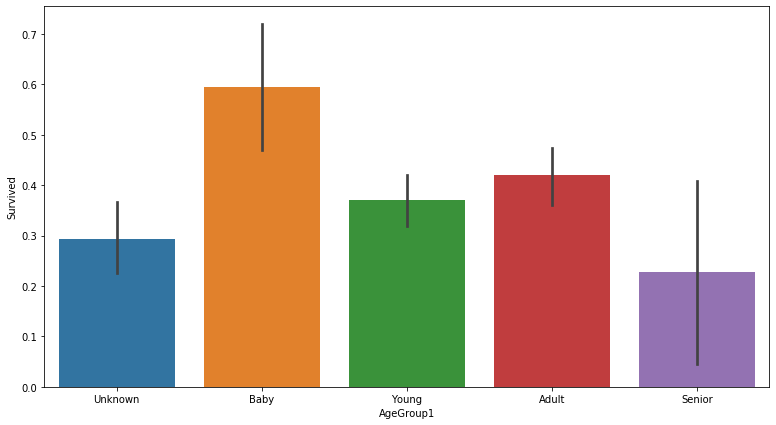

In [48]:
train['AgeGroup1'] = pd.cut(train['Age'], bins1, labels=labels1)
train['AgeGroup1'].head()

fig = plt.figure(figsize=(13, 7))
sns.barplot(x="AgeGroup1", y="Survived", data=train)
plt.show()

In [51]:
test['AgeGroup1'] = pd.cut(test['Age'], bins1, labels=labels1)
# test['AgeGroup1'].head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup1
0,892,3,"Kelly, Mr. James",male,22.0,0,0,330911,7.8292,NaN,Q,Young
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38.0,1,0,363272,7.0000,NaN,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,26.0,0,0,240276,9.6875,NaN,Q,Young
3,895,3,"Wirz, Mr. Albert",male,35.0,0,0,315154,8.6625,NaN,S,Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35.0,1,1,3101298,12.2875,NaN,S,Adult


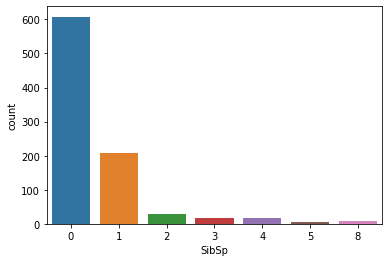

In [52]:
sns.countplot(x='SibSp', data=train)

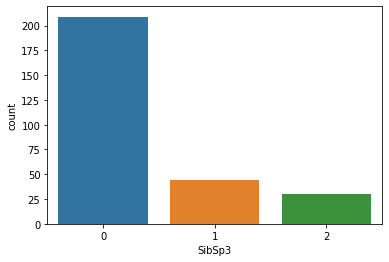

In [53]:
train['SibSp3'] = pd.cut(train['SibSp'], bins=[0,1,3,np.inf], labels=['0', '1', '2'])
sns.countplot(x='SibSp3', data=train)

In [54]:
train['CabinBool'] = (train['Cabin'].notnull().astype('int'))
test['CabinBool'] = (test['Cabin'].notnull().astype('int'))

In [56]:
train['CabinBool'].value_counts()

0    687
1    204
Name: CabinBool, dtype: int64

In [60]:
train = train.drop(['Cabin','Ticket'], axis=1)
test = test.drop(['Cabin','Ticket'], axis=1)

In [61]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [63]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'AgeGroup', 'AgeGroup1', 'SibSp3',
       'CabinBool'],
      dtype='object')

In [66]:
### 이름(Name) 
combine = [train, test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [67]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [68]:
train['Title'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Col', 'Mlle', 'Major',
       'Capt', 'Sir', 'Jonkheer', 'Don', 'Ms', 'Lady', 'Countess', 'Mme'],
      dtype='object')

In [71]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Capt',
                                                 'Col','Don','Dr',
                                                'Major','Rev','Jonkheer'], 
                                                'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess','Sir'], 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    

In [72]:
train['Title'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], dtype='object')

In [73]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,AgeGroup1,SibSp3,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,Young,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,Adult,0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,Young,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,Adult,0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,Adult,NaN,0,1


In [74]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

In [78]:
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]